One-hot encoding for words

In [ ]:
import numpy as np

samples = [ 'the cat sat on the mat.','the dog ate my homework.']

token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index)+1

In [ ]:
token_index

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'homework.': 9,
 'mat.': 5,
 'my': 8,
 'on': 4,
 'sat': 3,
 'the': 1}

In [ ]:
max_length = 7
results = np.zeros(shape=(len(samples),max_length, max(token_index.values()) + 1))
max_length , max(token_index.values())

(7, 9)

In [ ]:
results

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]])

In [ ]:
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
      index = token_index.get(word)
      results[i, j, index] = 1.

In [ ]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]])

One-hot encoding for characters

In [ ]:
import numpy as np
import string


samples = [ '001e cat sat on the mat.','the dog ate my homework.']
characters = string.printable
token_index = dict(zip(characters,range(1,len(characters)+1)))
results = np.zeros(shape=(len(samples),24, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
  for j,character in enumerate(sample):
     index = token_index.get(character)
     results[i,j,index] = 1.


In [ ]:
d=zip(characters,range(1,len(characters)+1))
list(d)

In [ ]:
results

array([[[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

Listing 6.3 Using Keras for word-level one-hot encoding

In [ ]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

Found 9 unique tokens.


In [ ]:
word_index

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'homework': 9,
 'mat': 5,
 'my': 8,
 'on': 4,
 'sat': 3,
 'the': 1}

In [ ]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

Listing 6.4 Word-level one-hot encoding with hashing trick (toy example)

In [ ]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [ ]:
(results[0][2] == 1).sum()

1

In [ ]:
hash('ali')

1642738669625639489

IMDB

In [ ]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)



In [ ]:
len(x_train[0])

218

In [ ]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [ ]:
np.array(x_train).shape , np.array(x_test).shape

((25000, 20), (25000, 20))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Embedding

model = Sequential()
model.add(Embedding( 10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile( optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.4484 - acc: 0.7937 - val_loss: 0.4947 - val_acc: 0.7496
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4140 - acc: 0.8147 - val_loss: 0.4920 - val_acc: 0.7534
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3946 - acc: 0.8243 - val_loss: 0.4930 - val_acc: 0.7580
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3657 - acc: 0.8379 - val_loss: 0.4963 - val_acc: 0.7548
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3503 - acc: 0.8522 - val_loss: 0.5011 - val_acc: 0.7556
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3372 - acc: 0.8622 - val_loss: 0.5083 - val_acc: 0.7532
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3163 - acc: 0.8661 - val_loss: 0.5155 - val_acc: 0.7502
Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
test_1 = x_test[0]
test_data = test_1.reshape(1,20)
result = model.predict(test_data)
result = np.round(result,3)
result , y_test[0]

(array([[0.364]], dtype=float32), 0)

In [ ]:
import numpy as np

y = np.array([[[2,5],[3,7]], [[4,9],[5,10]]])
out=y.flatten()
# out , out.shape, y.shape
x_train.shape

(25000, 20)

In [ ]:
Pretrainde emabedding

In [ ]:
import os, shutil
import cv2
import glob
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

 70% 18.0M/25.7M [00:00<00:00, 185MB/s]
100% 25.7M/25.7M [00:00<00:00, 163MB/s]


In [ ]:
!unzip "/content/glove.6B.zip"

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
data = pd.read_csv('/content/IMDB Dataset.csv')
# data.head()
texts = list(data['review'])
sentiment = list(data['sentiment'])
labels = []
for i,label in enumerate(sentiment):
  if label == 'positive':
     labels.insert(i,1)
  else:
     labels.insert(i,0)

labels = np.array(labels)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [ ]:
word_index = tokenizer.word_index
data = pad_sequences(sequences,maxlen=maxlen)
data.shape[0] , labels.shape

(50000, (50000,))

In [ ]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


In [ ]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples+validation_samples]
y_val = labels[training_samples:training_samples+validation_samples]


In [ ]:
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))


In [ ]:
reverse_word_map

In [ ]:
sentence = {}
for i, word in reverse_word_map.items():
    if i in x_val[0]:
      sentence[i] = word

In [ ]:
y_val[0]

0

Use Glove

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-03-31 07:11:33--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-03-31 07:11:33--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-03-31 07:11:33--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
embeddings_index = {}
f = open(os.path.join('/content/glove.6B.100d.txt'))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words,embedding_dim))

for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [ ]:
len(embedding_matrix)

10000

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Embedding

model = Sequential()
model.add(Embedding( max_words, 100, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [ ]:
model.compile( loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 2s 159ms/step - loss: 1.9866 - acc: 0.4953 - val_loss: 0.7862 - val_acc: 0.4986
Epoch 2/10
7/7 [==============================] - 1s 93ms/step - loss: 0.6081 - acc: 0.5768 - val_loss: 0.6856 - val_acc: 0.5550
Epoch 3/10
7/7 [==============================] - 1s 94ms/step - loss: 0.4564 - acc: 0.8526 - val_loss: 1.2432 - val_acc: 0.5018
Epoch 4/10
7/7 [==============================] - 1s 93ms/step - loss: 0.5132 - acc: 0.7797 - val_loss: 0.6899 - val_acc: 0.5563
Epoch 5/10
7/7 [==============================] - 1s 94ms/step - loss: 0.2115 - acc: 0.9886 - val_loss: 0.8165 - val_acc: 0.5173
Epoch 6/10
7/7 [==============================] - 1s 91ms/step - loss: 0.1882 - acc: 0.9642 - val_loss: 1.3293 - val_acc: 0.5023
Epoch 7/10
7/7 [==============================] - 1s 92ms/step - loss: 0.1916 - acc: 0.9134 - val_loss: 0.7430 - val_acc: 0.5603
Epoch 8/10
7/7 [==============================] - 1s 93ms/step - loss: 0.0753 - acc: 1.0000 - va

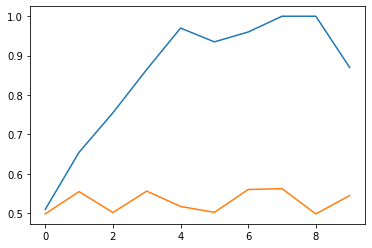

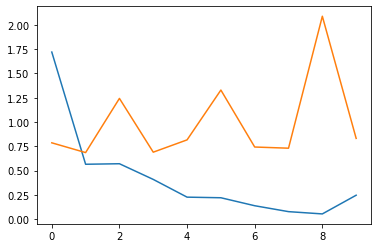

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

The Recurent Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense,LSTM, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.datasets import imdb
from keras.preprocessing import sequence


In [ ]:
max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train),(input_test, y_test) = imdb.load_data(num_words=max_features)

In [ ]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)


In [ ]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.add(Dense(1 , activation='sigmoid'))

In [ ]:
model.compile( loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [ ]:
history = model.fit( input_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 56s 87ms/step - loss: 0.6076 - acc: 0.6433 - val_loss: 0.4968 - val_acc: 0.7676
Epoch 2/10
625/625 [==============================] - 54s 87ms/step - loss: 0.3283 - acc: 0.8659 - val_loss: 0.3452 - val_acc: 0.8640
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.2575 - acc: 0.9019 - val_loss: 0.3594 - val_acc: 0.8476
Epoch 4/10
625/625 [==============================] - 54s 87ms/step - loss: 0.2081 - acc: 0.9239 - val_loss: 0.3387 - val_acc: 0.8734
Epoch 5/10
625/625 [==============================] - 54s 86ms/step - loss: 0.1952 - acc: 0.9296 - val_loss: 0.3454 - val_acc: 0.8552
Epoch 6/10
625/625 [==============================] - 53s 85ms/step - loss: 0.1447 - acc: 0.9486 - val_loss: 0.3804 - val_acc: 0.8580
Epoch 7/10
625/625 [==============================] - 53s 85ms/step - loss: 0.1332 - acc: 0.9535 - val_loss: 0.4465 - val_acc: 0.8600
Epoch 8/10
625/625 [==============================] - 53s 85ms

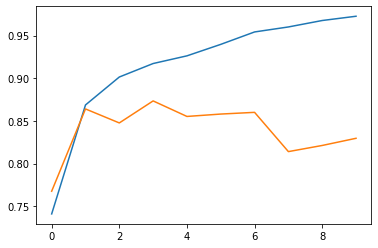

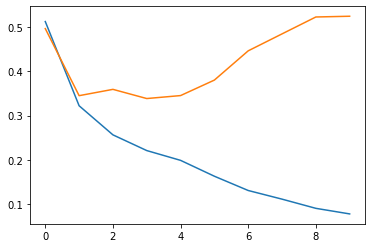

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

LSTM

In [ ]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(LSTM(32))
model.add(Dense(1 , activation='sigmoid'))

In [ ]:
model.compile( loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [ ]:
history = model.fit( input_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 87s 137ms/step - loss: 0.5282 - acc: 0.7184 - val_loss: 0.2926 - val_acc: 0.8804
Epoch 2/10
625/625 [==============================] - 86s 137ms/step - loss: 0.2652 - acc: 0.8964 - val_loss: 0.3026 - val_acc: 0.8818
Epoch 3/10
625/625 [==============================] - 85s 137ms/step - loss: 0.2132 - acc: 0.9188 - val_loss: 0.2854 - val_acc: 0.8824
Epoch 4/10
625/625 [==============================] - 85s 135ms/step - loss: 0.1916 - acc: 0.9303 - val_loss: 0.2877 - val_acc: 0.8914
Epoch 5/10
625/625 [==============================] - 84s 135ms/step - loss: 0.1743 - acc: 0.9380 - val_loss: 0.3049 - val_acc: 0.8888
Epoch 6/10
625/625 [==============================] - 85s 136ms/step - loss: 0.1528 - acc: 0.9454 - val_loss: 0.2845 - val_acc: 0.8832
Epoch 7/10
625/625 [==============================] - 85s 136ms/step - loss: 0.1543 - acc: 0.9440 - val_loss: 0.2873 - val_acc: 0.8906
Epoch 8/10
625/625 [==============================] - 8

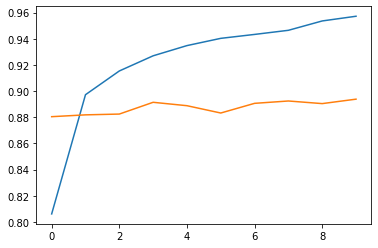

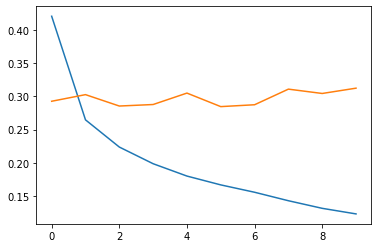

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

Conv1D on IMDB

In [ ]:
model = Sequential()
model.add(Embedding(max_features,128))
model.add(Conv1D(32,7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32,7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1 , activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 32)          28704     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, None, 32)          7200      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

In [ ]:
model.compile( loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [ ]:
history = model.fit( input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 9s 54ms/step - loss: 0.6230 - acc: 0.6256 - val_loss: 0.3296 - val_acc: 0.8616
Epoch 2/10
157/157 [==============================] - 8s 51ms/step - loss: 0.2711 - acc: 0.8933 - val_loss: 0.2954 - val_acc: 0.8792
Epoch 3/10
157/157 [==============================] - 8s 51ms/step - loss: 0.1964 - acc: 0.9277 - val_loss: 0.2977 - val_acc: 0.8794
Epoch 4/10
157/157 [==============================] - 8s 50ms/step - loss: 0.1443 - acc: 0.9501 - val_loss: 0.3401 - val_acc: 0.8698
Epoch 5/10
157/157 [==============================] - 8s 50ms/step - loss: 0.1035 - acc: 0.9658 - val_loss: 0.3511 - val_acc: 0.8778
Epoch 6/10
157/157 [==============================] - 8s 49ms/step - loss: 0.0684 - acc: 0.9779 - val_loss: 0.4315 - val_acc: 0.8670
Epoch 7/10
157/157 [==============================] - 8s 48ms/step - loss: 0.0394 - acc: 0.9896 - val_loss: 0.4437 - val_acc: 0.8764
Epoch 8/10
157/157 [==============================] - 7s 48ms/step - 

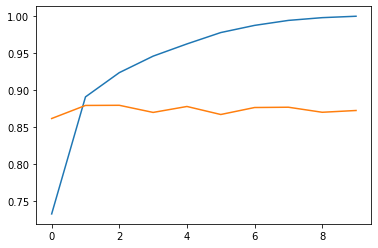

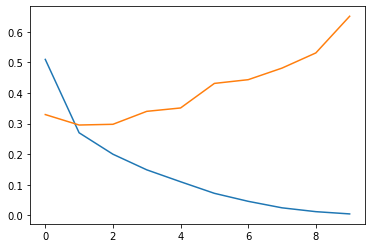

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()